In [1]:
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("category_dataset.csv", index_col = False)
df.head()

,Date & Time,Source IP,Destination IP,Source MAC,Destination MAC,Protocol,Flags,Src Port,Dst Port,Length,Class
0,27-02-2020 11:34,192.168.0.50,192.168.0.20,40:f2:e9:9d:44:6b,00:90:e8:5e:d1:66,TCP,AP,60394,502,64,Normal
1,27-02-2020 11:34,192.168.0.20,192.168.0.50,00:90:e8:5e:d1:66,40:f2:e9:9d:44:6b,TCP,A,502,60394,40,Normal
2,27-02-2020 11:34,192.168.0.50,192.168.0.20,40:f2:e9:9d:44:6b,00:90:e8:5e:d1:66,TCP,AP,60394,502,52,Normal
3,27-02-2020 11:34,192.168.0.21,192.168.0.5,20:47:47:87:d4:96,00:1d:9c:a1:89:a4,TCP,S,59170,20000,48,Normal
4,27-02-2020 11:34,192.168.0.21,192.168.0.5,20:47:47:87:d4:96,00:1d:9c:a1:89:a4,TCP,A,59170,20000,40,Normal


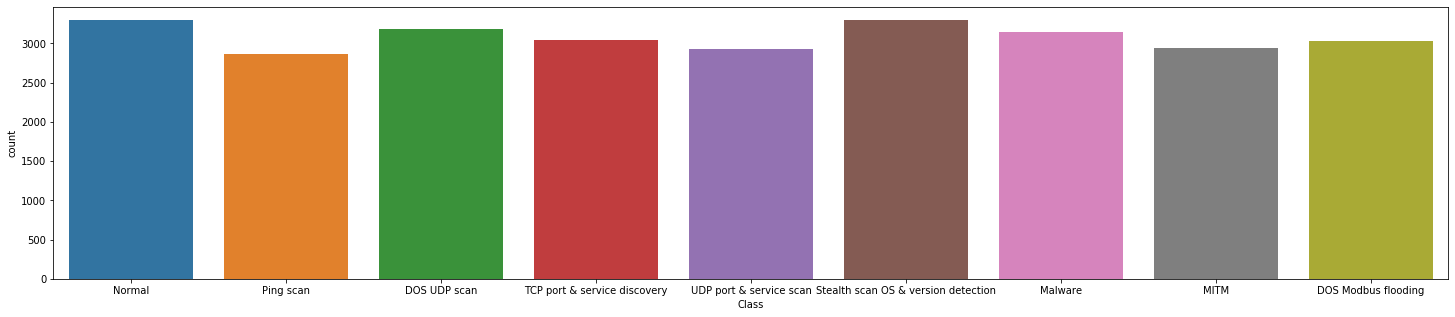

In [4]:
plt.figure(figsize= (25,5))
sns.countplot(x=df["Class"], data = df)

In [3]:
def change_class(data):
    lst = ['TCP port & service discovery','Stealth scan OS & version detection','Malware']
    if data in lst:
        return "Malware stealth scan"
    else:
        return data

In [4]:
df["Class"] = df["Class"].apply(change_class)

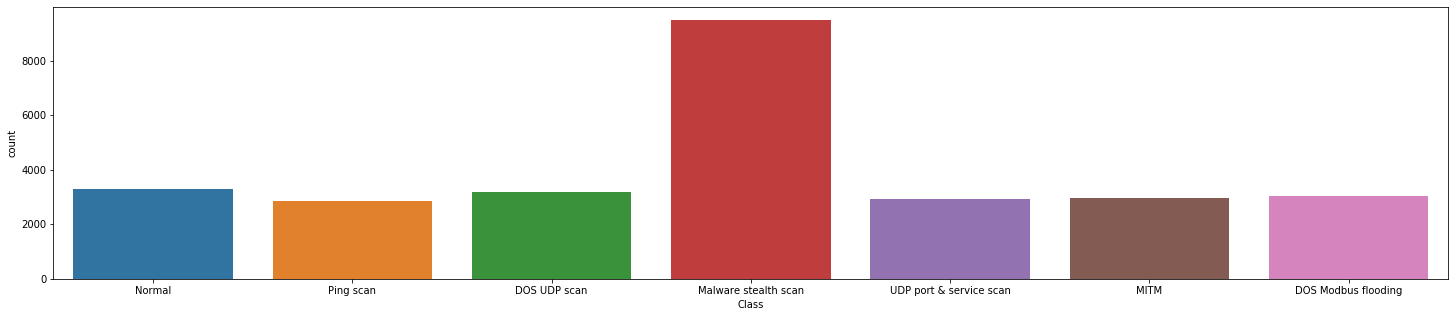

In [5]:
plt.figure(figsize= (25,5))
sns.countplot(x=df["Class"], data = df)

In [5]:
import random
random.seed(1)

In [6]:
X = df[['Source IP', 'Destination IP', 'Source MAC', 'Destination MAC', 'Protocol', 'Flags', 'Src Port', 'Dst Port',
       'Length']].values
y_category = df["Class"].values

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y_category = le.fit_transform(y_category)
enc = OneHotEncoder()
y = enc.fit_transform(y_category.reshape(-1,1)).toarray()

In [8]:
ce_bin = ce.BinaryEncoder(return_df=False)
enc_bin = ce_bin.fit(X)
X = enc_bin.transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_enc = sc.fit(X_train)
X_train = sc_enc.transform(X_train)
X_test = sc_enc.transform(X_test)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
classifier = Sequential()

Using TensorFlow backend.


In [12]:
classifier.add(Dense(input_dim = 39, output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 7, init= "uniform", activation = "softmax"))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=39, activation="relu", units=20, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [13]:
early_stop = EarlyStopping(monitor= 'val_loss', mode='min', verbose=1, patience = 15)
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [14]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_data = (X_test, y_test), callbacks=[early_stop] )

Train on 19420 samples, validate on 8324 samples
Epoch 1/100
19420/19420 [==============================] - 3s 137us/step - loss: 0.6851 - accuracy: 0.7072 - val_loss: 0.2351 - val_accuracy: 0.9331
Epoch 2/100
19420/19420 [==============================] - 3s 136us/step - loss: 0.1761 - accuracy: 0.9415 - val_loss: 0.1421 - val_accuracy: 0.9533
Epoch 3/100
19420/19420 [==============================] - 3s 170us/step - loss: 0.1393 - accuracy: 0.9506 - val_loss: 0.1336 - val_accuracy: 0.9574
Epoch 4/100
19420/19420 [==============================] - 3s 175us/step - loss: 0.1303 - accuracy: 0.9534 - val_loss: 0.1216 - val_accuracy: 0.9462
Epoch 5/100
19420/19420 [==============================] - 3s 170us/step - loss: 0.1242 - accuracy: 0.9546 - val_loss: 0.1235 - val_accuracy: 0.9506
Epoch 6/100
19420/19420 [==============================] - 3s 170us/step - loss: 0.1206 - accuracy: 0.9540 - val_loss: 0.1201 - val_accuracy: 0.9510
Epoch 7/100
19420/19420 [==============================] 

19420/19420 [==============================] - 3s 166us/step - loss: 0.0927 - accuracy: 0.9601 - val_loss: 0.0917 - val_accuracy: 0.9596
Epoch 56/100
19420/19420 [==============================] - 3s 147us/step - loss: 0.0930 - accuracy: 0.9593 - val_loss: 0.0912 - val_accuracy: 0.9602
Epoch 57/100
19420/19420 [==============================] - 3s 166us/step - loss: 0.0920 - accuracy: 0.9605 - val_loss: 0.0939 - val_accuracy: 0.9568
Epoch 58/100
19420/19420 [==============================] - 4s 206us/step - loss: 0.0930 - accuracy: 0.9606 - val_loss: 0.0933 - val_accuracy: 0.9601
Epoch 59/100
19420/19420 [==============================] - 4s 196us/step - loss: 0.0928 - accuracy: 0.9600 - val_loss: 0.0925 - val_accuracy: 0.9586
Epoch 60/100
19420/19420 [==============================] - 4s 185us/step - loss: 0.0959 - accuracy: 0.9597 - val_loss: 0.0938 - val_accuracy: 0.9589
Epoch 61/100
19420/19420 [==============================] - 3s 175us/step - loss: 0.0918 - accuracy: 0.9599 - val

Text(0, 0.5, 'Loss')

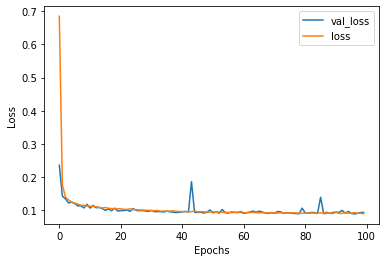

In [16]:
losses= pd.DataFrame(classifier.history.history)
losses[['val_loss','loss']].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [17]:
from keras.models import load_model

In [21]:
classifier.save("dnn_multiclass.h5")

In [24]:
predict = classifier.predict_classes(X_test)

In [25]:
predict

array([5, 5, 4, ..., 3, 1, 3], dtype=int64)

In [26]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_data = (X_test, y_test), callbacks=[early_stop] )

Train on 19420 samples, validate on 8324 samples
Epoch 1/100
19420/19420 [==============================] - 3s 132us/step - loss: 0.0916 - accuracy: 0.9590 - val_loss: 0.0929 - val_accuracy: 0.9602
Epoch 2/100
19420/19420 [==============================] - 3s 131us/step - loss: 0.0906 - accuracy: 0.9609 - val_loss: 0.0896 - val_accuracy: 0.9616
Epoch 3/100
19420/19420 [==============================] - 2s 129us/step - loss: 0.0894 - accuracy: 0.9592 - val_loss: 0.0924 - val_accuracy: 0.9589
Epoch 4/100
19420/19420 [==============================] - 3s 137us/step - loss: 0.0896 - accuracy: 0.9609 - val_loss: 0.0888 - val_accuracy: 0.9580
Epoch 5/100
19420/19420 [==============================] - 3s 145us/step - loss: 0.0901 - accuracy: 0.9603 - val_loss: 0.0891 - val_accuracy: 0.9599
Epoch 6/100
19420/19420 [==============================] - 3s 141us/step - loss: 0.0899 - accuracy: 0.9596 - val_loss: 0.0902 - val_accuracy: 0.9583
Epoch 7/100
19420/19420 [==============================] 

In [23]:
classifier.add(Dense(input_dim = 39, output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 7, init= "uniform", activation = "softmax"))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=39, activation="relu", units=20, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=7, kernel_initializer="uniform")`
  import sys


In [24]:
early_stop = EarlyStopping(monitor= 'val_loss', mode='min', verbose=1, patience = 25)
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [25]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 200, validation_data = (X_test, y_test), callbacks=[early_stop] )

Train on 19420 samples, validate on 8324 samples
Epoch 1/200
19420/19420 [==============================] - 4s 202us/step - loss: 0.6656 - accuracy: 0.7628 - val_loss: 0.2033 - val_accuracy: 0.9600
Epoch 2/200
19420/19420 [==============================] - 4s 189us/step - loss: 0.2690 - accuracy: 0.9313 - val_loss: 0.1449 - val_accuracy: 0.9587
Epoch 3/200
19420/19420 [==============================] - 4s 190us/step - loss: 0.2323 - accuracy: 0.9433 - val_loss: 0.1408 - val_accuracy: 0.9580
Epoch 4/200
19420/19420 [==============================] - 4s 190us/step - loss: 0.1890 - accuracy: 0.9462 - val_loss: 0.1302 - val_accuracy: 0.9596
Epoch 5/200
19420/19420 [==============================] - 4s 199us/step - loss: 0.1728 - accuracy: 0.9485 - val_loss: 0.1273 - val_accuracy: 0.9600
Epoch 6/200
19420/19420 [==============================] - 4s 181us/step - loss: 0.1625 - accuracy: 0.9501 - val_loss: 0.1303 - val_accuracy: 0.9576
Epoch 7/200
19420/19420 [==============================] 

19420/19420 [==============================] - 3s 179us/step - loss: 0.1152 - accuracy: 0.9542 - val_loss: 0.0990 - val_accuracy: 0.9587
Epoch 110/200
19420/19420 [==============================] - 4s 182us/step - loss: 0.1128 - accuracy: 0.9564 - val_loss: 0.1011 - val_accuracy: 0.9590
Epoch 111/200
19420/19420 [==============================] - 4s 180us/step - loss: 0.1128 - accuracy: 0.9547 - val_loss: 0.0973 - val_accuracy: 0.9593
Epoch 112/200
19420/19420 [==============================] - 3s 179us/step - loss: 0.1142 - accuracy: 0.9551 - val_loss: 0.1029 - val_accuracy: 0.9558
Epoch 113/200
19420/19420 [==============================] - 3s 179us/step - loss: 0.1206 - accuracy: 0.9540 - val_loss: 0.1014 - val_accuracy: 0.9581
Epoch 114/200
19420/19420 [==============================] - 3s 176us/step - loss: 0.1130 - accuracy: 0.9544 - val_loss: 0.1087 - val_accuracy: 0.9572
Epoch 00114: early stopping


In [26]:
classifier.add(Dense(input_dim = 39, output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 14, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 7, init= "uniform", activation = "softmax"))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=39, activation="relu", units=20, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=14, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` cal

In [27]:
early_stop = EarlyStopping(monitor= 'val_loss', mode='min', verbose=1, patience = 25)
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [28]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 200, validation_data = (X_test, y_test), callbacks=[early_stop] )

Train on 19420 samples, validate on 8324 samples
Epoch 1/200
19420/19420 [==============================] - 5s 238us/step - loss: 0.7888 - accuracy: 0.7248 - val_loss: 0.8703 - val_accuracy: 0.9167
Epoch 2/200
19420/19420 [==============================] - 4s 228us/step - loss: 0.5101 - accuracy: 0.9074 - val_loss: 0.4005 - val_accuracy: 0.9124
Epoch 3/200
19420/19420 [==============================] - 4s 228us/step - loss: 0.4051 - accuracy: 0.9105 - val_loss: 0.3812 - val_accuracy: 0.9063
Epoch 4/200
19420/19420 [==============================] - 5s 232us/step - loss: 0.3511 - accuracy: 0.9009 - val_loss: 0.2893 - val_accuracy: 0.9087
Epoch 5/200
19420/19420 [==============================] - 4s 230us/step - loss: 0.3205 - accuracy: 0.9053 - val_loss: 0.2763 - val_accuracy: 0.9116
Epoch 6/200
19420/19420 [==============================] - 4s 213us/step - loss: 0.3014 - accuracy: 0.9056 - val_loss: 0.2680 - val_accuracy: 0.9185
Epoch 7/200
19420/19420 [==============================] 

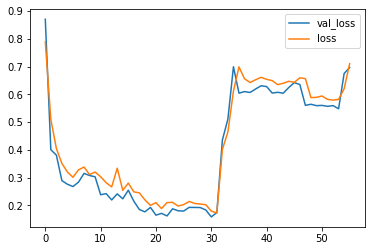

In [29]:
losses= pd.DataFrame(classifier.history.history)
losses[['val_loss','loss']].plot()

In [30]:
classifier.add(Dense(input_dim = 39, output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 20, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 14, init= "uniform", activation = "relu"))
classifier.add(Dense(output_dim = 7, init= "uniform", activation = "softmax"))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=39, activation="relu", units=20, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=14, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=7, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [31]:
early_stop = EarlyStopping(monitor= 'val_loss', mode='min', verbose=1, patience = 25)
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [32]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 200, validation_data = (X_test, y_test), callbacks=[early_stop] )

Train on 19420 samples, validate on 8324 samples
Epoch 1/200
19420/19420 [==============================] - 5s 265us/step - loss: 1.1822 - accuracy: 0.5291 - val_loss: 1.0428 - val_accuracy: 0.6110
Epoch 2/200
19420/19420 [==============================] - 5s 245us/step - loss: 1.0031 - accuracy: 0.5966 - val_loss: 0.8897 - val_accuracy: 0.6374
Epoch 3/200
19420/19420 [==============================] - 5s 252us/step - loss: 0.8770 - accuracy: 0.6627 - val_loss: 0.7949 - val_accuracy: 0.6933
Epoch 4/200
19420/19420 [==============================] - 5s 264us/step - loss: 0.7828 - accuracy: 0.6952 - val_loss: 0.7521 - val_accuracy: 0.6976
Epoch 5/200
19420/19420 [==============================] - 5s 233us/step - loss: 0.7383 - accuracy: 0.6963 - val_loss: 0.7108 - val_accuracy: 0.6981
Epoch 6/200
19420/19420 [==============================] - 5s 234us/step - loss: 0.7211 - accuracy: 0.6976 - val_loss: 0.7141 - val_accuracy: 0.6931
Epoch 7/200
19420/19420 [==============================] 